In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime
import datetime
import math
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
import matplotlib.gridspec as gridspec
from IPython.display import HTML

In [2]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis')

In [3]:
data = pd.read_csv('database_biosense.csv',header=0, delimiter=';',skiprows=1)
data.head()

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Irrigation,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date
0,G-1/1,"63,38",2018,Maize,0,NS 205,Maize,184,0,"237,719575",...,9000,"11853,74",9450,"5037,277795","15202,25308","7,811454718","14,4","112484,9479",15.6.2018,15.10.2018
1,G-1/2,"23,01",2018,Barley,0,Salamandre,Maize,46,0,"238,6363636",...,0,"11762,74","8594,30605","7079,225979",1435,"7,146352313","15,8","112912,3665",28.9.2017,5.6.2018
2,G-2/1,"94,88",2018,Soybean,0,Gorstak,Maize,"100,33",0,"214,6331148",...,9000,"11549,5","10191,21689","7146,257137","11843,41404","3,388877141","37,35","126574,5612",19.4.2018,13.9.2018
3,G-2/2,"20,59",2018,Soybean,0,Wendy,Maize,"93,15",0,"140,8450704",...,0,"11571,08","5428,848956","4776,056338","12594,37882","3,71296746","37,35","138679,3346",17.4.2018,14.9.2018
4,G-3/1,"63,62",2018,Maize,0,DKC 5830,Wheat,60,"1,886199308","474,6934926",...,9000,"12801,04","19899,77051","19745,51399","4947,696479","14,60232631","14,4","210273,4989",17.4.2018,14.9.2018


In [4]:
data.isnull().any()

Parcel                    False
Area                      False
Year                      False
Crop                      False
Seed production           False
Variety                    True
Previous crop              True
Seed units                 True
Manure                    False
Fertiliser amount         False
Pesticide amount          False
Tillage                   False
Sowing                    False
Fertiliser application    False
Pesticide application     False
Irrigation                False
Harvest                   False
Seed                      False
Fertiliser                False
Pesticide                 False
Yield                     False
Price                     False
Revenue                   False
Planting date              True
Harvest date               True
dtype: bool

In [5]:
data.fillna({'Variety':'None','Previous crop': 'None', 'Seed units': '0'}, inplace=True)

In [6]:
convert_todot = lambda x: float(x.replace(',','.'))

In [7]:
data['Area'] = data['Area'].apply(convert_todot)

In [8]:
for i in list(data)[7:23]:
    try:
        data[i] = data[i].apply(convert_todot)
    except ValueError:
        continue

In [9]:
drop = data['Planting date'].dropna()
i1 = list(drop.index.values)
dfdates = data.loc[i1]

In [10]:
drop2 = dfdates['Harvest date'].dropna()
i2 = list(drop2.index.values)
dfdates = dfdates.loc[i2]

In [11]:
convert_date = lambda x: datetime.datetime.strptime(str(x), '%d.%m.%Y')

In [12]:
dfdates['Planting date'] = dfdates['Planting date'].apply(convert_date)
dfdates['Harvest date'] = dfdates['Harvest date'].apply(convert_date)

In [13]:
crops = list(data['Crop'].unique())
crops

['Maize',
 'Barley',
 'Soybean',
 'Wheat',
 'Sunflower',
 'Oilseed rape',
 '2nd soybean']

In [14]:
n = len(crops)

In [ ]:
def plot_ph_date(dfdates,i):
    crop = list(dfdates['Crop'].unique())
    fig = plt.figure(figsize=(12,10))
    gs = gridspec.GridSpec(2,2)
    df = dfdates[dfdates['Crop']==crop[i]]
    
    dates = ['Planting date','Harvest date']
    
    ax1 = fig.add_subplot(gs[0,:])
    ax1.hist(df['Planting date'],color='darkgreen')
    ax1.hist(df['Harvest date'],color='darkorange')
    
        
    index_planting = [k for k in df[dates[0]].index.values if df.loc[k,dates[0]].year == 2017]
    index_harvest = [k for k in df[dates[1]].index.values if df.loc[k,dates[1]].year == 2017]
    title = '2017.'
    
    if crop[i] == 'Barley':
        index_harvest = [k for k in df[dates[1]].index.values if df.loc[k,dates[1]].year == 2018]
        ax1.clear()
        ax1.hist(df['Planting date'],color='darkgreen')
        ax1.hist(df['Harvest date'],bins=2,color='darkorange')
        title = '2018.'
    if crop[i] == '2nd soybean':
        ax1.clear()
        ax1.hist(df['Planting date'],bins=4,color='darkgreen')
        ax1.hist(df['Harvest date'],bins=4,color='darkorange')
    ax1.set_ylabel('counts',fontsize=16)
    ax1.legend()
    ax1.grid(axis='y',color='lightgrey',alpha=0.5)
    ax1.set_facecolor('w')
    
    y = ax1.get_yticks()
    if max(y) < 8:
        yint = range(math.floor(min(y)), math.ceil(max(y)))
    else:
        yint = range(math.floor(min(y)), math.ceil(max(y))+1,4)
    ax1.set_yticks(yint)
    
    p_dates = df[dates[0]].loc[index_planting]
    h_dates = df[dates[1]].loc[index_harvest]
    
    
    ax = fig.add_subplot(gs[1,0])
    ax.hist(p_dates.values,color='darkgreen')
    ax.set_title('Distribution of '+dates[0]+' for 2017. year')
    ax.set_ylabel('counts',fontsize=10)
    ax.set_xlabel(dates[0], fontsize=10)
    ax.grid(axis='y',color='lightgrey',alpha=0.5)
    ax.set_facecolor('w')
    
    y = ax.get_yticks()
    if max(y) <= 5:
        yint = range(math.floor(min(y)), math.ceil(max(y)))
    else:
        yint = range(math.floor(min(y)), math.ceil(max(y))+1,2)
    ax.set_yticks(yint)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(55)
        
    ax2 = fig.add_subplot(gs[1,1])
    ax2.hist(h_dates.values,color='darkorange')
    ax2.set_title('Distribution of '+dates[1]+' for '+title+' year')
    ax2.set_ylabel('counts',fontsize=10)
    ax2.set_xlabel(dates[1], fontsize=10)
    ax2.grid(axis='y',color='lightgrey',alpha=0.5)
    ax2.set_facecolor('w')
    
    y = ax2.get_yticks()
    if max(y) <= 5:
        yint = range(math.floor(min(y)), math.ceil(max(y)))
    else:
        yint = range(math.floor(min(y)), math.ceil(max(y))+1,2)
    ax2.set_yticks(yint)
    
    for tick in ax2.get_xticklabels():
        tick.set_rotation(55)
        
    pd = np.arange(p_dates.min()-datetime.timedelta(days=10),p_dates.max()+datetime.timedelta(days=10),datetime.timedelta(days=1)) 
    hd = np.arange(h_dates.min()-datetime.timedelta(days=10),h_dates.max()+datetime.timedelta(days=10),datetime.timedelta(days=1))

    ax.set_xticklabels([str(d)[:10] for d in pd])
    ax2.set_xticklabels([str(d)[:10] for d in hd])
    
    fig.align_labels()
    fig.suptitle(crop[i], fontsize = 30, y=0.99, fontweight='bold')
    fig.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.35)
    #plt.savefig(crop[i]+".png", dpi=100,bbox_inches='tight',transparent=True)
    plt.show()
    

In [ ]:
plot_ph_date(dfdates,0)

In [ ]:
for i in range(n):
    plot_ph_date(dfdates,i)

In [ ]:
def plot_yield(data,i):
    crop = list(data['Crop'].unique())
    
    df2 = data[data['Crop']==crop[i]]
    
    df16 = df2[df2['Year'] == 2016]
    std16 = np.std(df16['Yield'])
    df17 = df2[df2['Year'] == 2017]
    std17 = np.std(df17['Yield'])
    df18 = df2[df2['Year'] == 2018]
    std18 = np.std(df18['Yield'])    
    
    box_line_col = ['steelblue','darkorange','darkgreen']
    if df16.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
    if df17.shape[0] <= 2:
        df2 = df2.query('Year == 2016 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
        if df16.shape[0] <= 2:
            box_line_col = ['steelblue']
            
    if df18.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2016')
        box_line_col = ['steelblue','darkgreen']
        if df17.shape[0] <= 2:
            box_line_col = ['darkorange']
    
    if df2.shape[0] <= 2:
        fig = plt.figure(figsize=(10,1))
        ax = fig.add_subplot(111)
        ax.text(0.1,1.5,'A little bit of data for '+crop[i]+'! Please expand your database.',fontsize=20,fontweight='bold',color='r')
        plt.axis('off')
    else:
        fig2 = plt.figure(figsize=(10,5))
        ax = fig2.add_subplot(1,1,1)
        palette = ["lightsteelblue", "navajowhite", "lightgreen"]
        sns.boxplot(x='Year',y='Yield',data=df2,palette=palette)
        ax.grid(axis='y',color='darkgray')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_color('darkgray')
    
    
    
        for j,col in enumerate(box_line_col):
            mybox = ax.artists[j]
            mybox.set_edgecolor(col)
            for k in range(j*6,j*6+6):
                line = ax.lines[k]
                line.set_color(col)
                line.set_mfc(col)
                line.set_mec(col)
    
        text = '\n'.join(('Variability of yield:',"\u2022 std 2016: "+str(round(std16,2)), '\u2022 std 2017: '+str(round(std17,2)),
                      '\u2022 std 2018: '+str(round(std18,2))))
        props = dict(boxstyle='round',facecolor='white', edgecolor='darkgreen', alpha=0.5,pad=0.5)
        plt.figtext(0.99, 0.4,text,family='sans-serif', color='k', fontsize=13, bbox=props)
    
        fig2.tight_layout()
        fig2.suptitle(crop[i],x=0.5,y=1.05,fontsize=20,fontweight='bold')
        #plt.savefig(crop[i]+"_yield.png", dpi=100,bbox_inches='tight',transparent=True)
        plt.show()

In [ ]:
plot_yield(data,6)

In [ ]:
for i in range(n):
    plot_yield(data,i)

In [ ]:
def func(pct, allvals):
    percent = float((100*pct)/allvals.sum())
    return "{:.2f}%".format(pct,percent)

In [ ]:
for i in range(n):
    
    df5 = data[data['Crop'] == crops[i]]
    length = len(df5['Variety'].unique())
    
    if length>4:
        fig5 = plt.figure(figsize=(8,8))
        ax5 = fig5.add_subplot(111)
    
        vc = df5['Variety'].value_counts()
        sort = vc.sort_values(ascending=False)
        ssum = sort.sum()
        pie = sort.iloc[:5]
        pie = pie.append(pd.Series([ssum-pie.sum()],index=['Others']))
        
        wedges, texts, autotexts = ax5.pie(x=pie,autopct=lambda pct: func(pct, pie),radius=0.8)
        plt.setp(autotexts,fontsize=13,fontweight='bold', color='w')
        
        ax5.legend(loc=0,labels=list(pie.index.values),fontsize=15)
    
        props = dict(facecolor='white',edgecolor='dimgrey',alpha=0.5,pad=10)
        text = 'Planted unique varieties: '+str(length)
        plt.figtext(0.1,0.87,text,bbox=props,fontsize=15,va='top', ha='left')
        
        ax5.axis('off')
        
        fig5.suptitle(crops[i],x=0.5,y=1,fontsize=40,fontweight='medium')
        #plt.savefig(crops[i]+"_varieties.png", dpi=360,transparent=True)
        fig5.tight_layout()
plt.show()

In [146]:
pivot = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0,margins=True)
pivot

Crop,2nd soybean,Barley,Maize,Oilseed rape,Soybean,Sunflower,Wheat,All
Previous crop,,,,,,,,
Maize,0,1,1,0,10,8,15,35
None,0,1,30,0,6,38,19,94
Oilseed rape,0,0,0,0,0,0,1,1
Soybean,0,0,12,0,0,0,0,12
Sunflower,0,0,9,0,0,0,15,24
Wheat,1,0,16,5,2,7,0,31
All,1,2,68,5,18,53,50,197


In [ ]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="tbody tr:last-child", props=[("font-weight","bold")]),
          dict(selector="tr td:last-child", props=[("font-weight","bold")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler = pivot.style.set_table_styles(styles).set_caption('Pervious crop - crop pivot table')

styler

In [ ]:
chi2,p,q,expected = stats.chi2_contingency(pivot)
chi2,p,q

In [ ]:
stats.chi2.ppf(0.99,42)

In [ ]:
def cdf(x,q):
    return 1/(math.pow(2,q/2)*math.gamma(q/2))*math.pow(x,q/2-1)*math.pow(math.e,-x/2)
def cdf_array(x,q):
    l = []
    for i in x:
        l.append(float(cdf(i,q)))
    return np.array(l)

In [ ]:
1-stats.chi2.cdf(chi2,42)

In [ ]:
sns.set(style='darkgrid',rc={"figure.figsize": (15, 8)})

x = np.linspace(0,150,150)
ax = sns.lineplot(x,cdf_array(x,q),label='chi-squared distribution function',linewidth=3.3)



ax.plot([chi2], [cdf(chi2,q)], 'o',markersize=10)
ax.text(chi2-5,cdf(chi2,q)-0.002,str(round(chi2,2)))
ax.annotate(r'$\chi^2 $ reg',xy=(chi2,0),xytext=(chi2+1,0.004),arrowprops=dict(facecolor='b', shrink=0.05))

alpha = stats.chi2.ppf(0.99,q)
ax.fill_between(x,0,cdf_array(x,q),where=x>alpha,color='r')
ax.plot([alpha], [0], 'o',markersize=10)
ax.text(alpha-2,cdf(chi2,q)-0.002,str(round(stats.chi2.ppf(0.99,q),2)))
ax.annotate(r'$ \alpha $ = 0.01',xy=(alpha,0),xytext=(alpha+5,0.005),fontsize=15,arrowprops=dict(facecolor='b', shrink=0.05))
ax.text(90,0.005,'$ H_0 $ rejection region',fontsize=20)

if p <= 0.01:
    ax.text(100,0.03,'Previous crop and Crop attribute\n are dependent at level confidence 0.01.',ha='center',wrap=True,fontsize=20)
elif p <= 0.05:
    ax.text(100,0.03,'Previous crop and Crop attribute are dependent at level confidence 0.05.',ha='center',wrap=True,fontsize=20)
else:
    ax.text(100,0.03,'Previous crop and Crop attribute are independent.',ha='center',wrap=True,fontsize=20)

""" If the null hypothesis is true, the observed and expected frequencies will be close in value and the χ2 statistic will be 
close to zero. If the null hypothesis is false, then the χ2 statistic will be large"""
ax.set_title('Chi-squared distribution (q = '+str(q)+') for Previous crop - Crop',fontsize=20,fontweight=5)
ax.grid(color='darkgrey',alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('darkgray')
ax.spines['left'].set_color('darkgray')
figure = ax.get_figure()
figure.savefig('chi2.png',transparent=True)
plt.show()

In [15]:
dfdates['Duration of \n season (days)'] = dfdates['Harvest date']-dfdates['Planting date']

In [16]:
dfdates['Duration of \n season (days)'] = dfdates['Duration of \n season (days)'].apply(lambda x: float(x.days))
dfdates

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date,Duration of season (days)
0,G-1/1,63.38,2018,Maize,0,NS 205,Maize,184.000000,0.000000,237.719575,...,11853.74,9450.000000,5037.277795,15202.253080,7.811455,14.40,112484.94790,2018-06-15,2018-10-15,122.0
1,G-1/2,23.01,2018,Barley,0,Salamandre,Maize,46.000000,0.000000,238.636364,...,11762.74,8594.306050,7079.225979,1435.000000,7.146352,15.80,112912.36650,2017-09-28,2018-06-05,250.0
2,G-2/1,94.88,2018,Soybean,0,Gorstak,Maize,100.330000,0.000000,214.633115,...,11549.50,10191.216890,7146.257137,11843.414040,3.388877,37.35,126574.56120,2018-04-19,2018-09-13,147.0
3,G-2/2,20.59,2018,Soybean,0,Wendy,Maize,93.150000,0.000000,140.845070,...,11571.08,5428.848956,4776.056338,12594.378820,3.712967,37.35,138679.33460,2018-04-17,2018-09-14,150.0
4,G-3/1,63.62,2018,Maize,0,DKC 5830,Wheat,60.000000,1.886199,474.693493,...,12801.04,19899.770510,19745.513990,4947.696479,14.602326,14.40,210273.49890,2018-04-17,2018-09-14,150.0
5,G-3/2,17.80,2018,Maize,0,DKC 5830,Wheat,14.000000,2.134831,264.044944,...,12801.04,16595.812360,8427.921348,6112.939326,13.635393,14.40,196349.66290,2018-04-17,2018-09-14,150.0
6,G-4/1,63.32,2018,Soybean,0,Galeb,Maize,74.226153,0.000000,307.643714,...,11571.08,7447.109918,10072.501580,11048.218540,3.975837,37.35,148497.51260,2018-04-13,2018-09-16,156.0
7,G-4/2,24.71,2018,Soybean,0,Galeb,Maize,80.938891,0.000000,273.735330,...,11571.08,7447.109918,10072.501580,11048.218540,4.068798,37.35,151969.60740,2018-04-13,2018-09-16,156.0
8,G-5/1,76.88,2018,Maize,0,DKC 5830,Soybean,0.949532,0.000000,386.485432,...,12801.04,20071.655440,7823.860562,9002.979318,16.763788,14.40,241398.54320,2018-04-13,2018-09-16,156.0
9,G-5/2,20.98,2018,Maize,0,DKC 5830,Soybean,0.810296,0.000000,266.920877,...,12801.04,19877.951480,8530.791230,7781.716397,11.231649,14.40,161735.74830,2018-04-13,2018-09-16,156.0


In [ ]:
def corr(y):    
    Z = {}  #for centered attributes vectors
    for j in list(y):
        mean = y[j].sum()*(1/y[j].shape[0])
        Z[j] = [i - mean for i in y[j]] #centered vector for attribute j
        
    df_dic = {' ': list(y)}
    for j in list(y):
        Zj = np.array(Z[j])
        df_list = []
        for i in list(y):
            Zi = np.array(Z[i])
            norm_Zj = np.linalg.norm(Zj,2)
            norm_Zi = np.linalg.norm(Zi,2)
            df_list.append(np.dot(np.transpose(Zj/norm_Zj),Zi/norm_Zi)) #corr = cos(teta) for every two attributes i and j
        df_dic[j] = df_list #correlations for attribute j relative to all attributes (include corr for j,j) 
    columns = list(df_dic.keys())
    sigmaCorr = pd.DataFrame(df_dic, columns = columns)
    sigmaCorr = sigmaCorr.set_index(' ')
    sns.set(font_scale=1, rc={"figure.figsize": (8, 8)})
    ax = sns.heatmap(sigmaCorr, square=True, annot=True,annot_kws={'fontsize': 20},cmap="YlGn")
    ax.set_yticklabels(list(y),fontsize=13,rotation=0)
    ax.set_xticklabels(list(y),fontsize=13,rotation=90)
    plt.title('Heat map for correlation', fontsize='20')
    figure = ax.get_figure()
    #figure.savefig('correlation.png',bbox_inches='tight',transparent=True)
    return sigmaCorr

In [ ]:
corr_list = ['Yield','Seed','Fertiliser','Pesticide','Duration of \n season (days)']

In [ ]:
dfcorr = dfdates[corr_list]
for i in corr_list:
    for j in dfcorr[i].index.values:
        if dfcorr.loc[j,i] == 0:
            dfcorr = dfcorr.drop(j,axis=0)

In [ ]:
dfcorr.dtypes

In [ ]:
corr(dfcorr)

In [17]:
costs = list(data)[11:20]
costs

['Tillage',
 'Sowing',
 'Fertiliser application',
 'Pesticide application',
 'Irrigation',
 'Harvest',
 'Seed',
 'Fertiliser',
 'Pesticide']

In [18]:
dfcosts = data[costs]
for i in dfcosts['Pesticide application'].index.values:
    try:
        float(dfcosts.loc[i,'Pesticide application'].replace(',','.'))
    except ValueError:
        dfcosts = dfcosts.drop(i,axis=0)
        datap = data.drop(i,axis=0)
dfcosts['Pesticide application'] = dfcosts['Pesticide application'].apply(convert_todot)

In [19]:
datap['Profit'] = datap['Revenue'] - dfcosts.sum(axis=1)

In [20]:
sort = datap['Profit'].sort_values(ascending=False)

In [21]:
parcel = []
crop_list = []
area = []
profit = []
yield_ = []
for i in sort[:5].index.values:
    profit += [round(sort.loc[i],2)]
    parcel += [datap.loc[i,'Parcel']]
    crop_list += [datap.loc[i,'Crop']]
    area += [round(datap.loc[i,'Area'],2)]
    yield_ += [round(datap.loc[i,'Yield']*1000,2)]
d = {'': [1,2,3,4,5],'Parcel': parcel,'Area (ha)': area,'Crop': crop_list,'Yield (kg/ha)': yield_,'Profit (RSD/ha)': profit}
top5 = pd.DataFrame(d,columns=['','Parcel','Area (ha)','Crop','Yield (kg/ha)','Profit (RSD/ha)'])
top5

,,Parcel,Area (ha),Crop,Yield (kg/ha),Profit (RSD/ha)
0,1,167B,3.77,Sunflower,7750.00,170463.89
1,2,ED Backa,3.56,Sunflower,7310.00,152209.42
2,3,G-5/1,76.88,Maize,16763.79,147285.83
3,4,G-8/1,78.49,Maize,15672.08,144390.43
4,5,G-3/2,17.80,Maize,13635.39,124376.19


In [22]:
top5 = top5.set_index('')
top5

,Parcel,Area (ha),Crop,Yield (kg/ha),Profit (RSD/ha)
,,,,,
1,167B,3.77,Sunflower,7750.00,170463.89
2,ED Backa,3.56,Sunflower,7310.00,152209.42
3,G-5/1,76.88,Maize,16763.79,147285.83
4,G-8/1,78.49,Maize,15672.08,144390.43
5,G-3/2,17.80,Maize,13635.39,124376.19


In [ ]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler2 = top5.style.set_table_styles(styles).set_caption("Top 5 fileds with best profit")

styler2

In [23]:
grouped_profit = datap['Profit'].groupby(datap['Crop'])
profit_mean = grouped_profit.mean()
profit_mean

Crop
2nd soybean    -36906.834983
Barley          50174.853969
Maize           57599.027525
Oilseed rape    38036.122779
Soybean         62208.379766
Sunflower       26573.120755
Wheat           20725.734688
Name: Profit, dtype: float64

In [ ]:
sns.set(style='darkgrid',rc={"figure.figsize": (15, 8)})
palette=['lightsteelblue','plum','lightgreen','burlywood','lightsalmon','navajowhite','gold']
ax = sns.boxplot(x='Crop',y='Profit',data=datap[['Crop','Profit']],palette=palette)

box_line_col = ['steelblue','indigo','darkgreen','saddlebrown','darkred','darkorange','gold']

for j,col in enumerate(box_line_col):
    mybox = ax.artists[j]
    mybox.set_edgecolor(col)
    for k in range(j*6,j*6+6):
        line = ax.lines[k]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax.set_ylabel('profit',fontsize=15)
ax.set_xlabel('crop',fontsize=15)
ax.set_xticklabels(crops,fontsize=16)
y = ax.get_yticks()
yint = range(math.floor(min(y)),math.ceil(max(y)),20000)
ax.set_yticks(yint)


ax.set_title('Profit by crop', fontsize=30,fontweight='bold')
ax.grid(color='darkgrey',alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('darkgray')
ax.spines['left'].set_color('darkgray')

figure = ax.get_figure()
#figure.savefig('Profit by crop',transparent=True)
plt.show()

In [24]:
sorted_profit = profit_mean.sort_values(ascending=False)
sorted_profit

Crop
Soybean         62208.379766
Maize           57599.027525
Barley          50174.853969
Oilseed rape    38036.122779
Sunflower       26573.120755
Wheat           20725.734688
2nd soybean    -36906.834983
Name: Profit, dtype: float64

In [25]:
profit_std = grouped_profit.std()
profit_std

Crop
2nd soybean              NaN
Barley           7860.820524
Maize           53521.963942
Oilseed rape    20674.666337
Soybean         29298.820126
Sunflower       36091.136935
Wheat           33398.308669
Name: Profit, dtype: float64

In [26]:
relative = profit_std/profit_mean
relative

Crop
2nd soybean          NaN
Barley          0.156669
Maize           0.929216
Oilseed rape    0.543553
Soybean         0.470979
Sunflower       1.358182
Wheat           1.611441
Name: Profit, dtype: float64

In [27]:
relative.dropna(inplace=True)
relative

Crop
Barley          0.156669
Maize           0.929216
Oilseed rape    0.543553
Soybean         0.470979
Sunflower       1.358182
Wheat           1.611441
Name: Profit, dtype: float64

In [28]:
sorted_relative = relative.sort_values(ascending=False)
sorted_relative

Crop
Wheat           1.611441
Sunflower       1.358182
Maize           0.929216
Oilseed rape    0.543553
Soybean         0.470979
Barley          0.156669
Name: Profit, dtype: float64

In [49]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis\\images')

In [128]:
def profit(data,i):
    palette = ['coral','springgreen','goldenrod','lightgreen','y','yellowgreen','mediumaquamarine']
    crop = list(data['Crop'].unique())
    df = data[data['Crop']==crop[i]]
    
    grouped_profit = datap['Profit'].groupby(datap['Crop'])
    profit_mean = grouped_profit.mean()
    profit_std = grouped_profit.std()
    relative = profit_std/profit_mean
    relative.dropna(inplace=True)
    
    fig = plt.figure(figsize=(8,8),facecolor=palette[i])
    if crop[i] == '2nd soybean':
        ax = fig.add_subplot(111)
        ax.text(0.1,1.5,'A little bit of data for '+crop[i]+'! Please expand your database.',fontsize=20,fontweight='bold',color='r')
        plt.axis('off')
    else:
        gs = gridspec.GridSpec(2,2)
    
        ax = fig.add_subplot(gs[0,1])
        im = plt.imread(crop[i]+'.png')
        im[np.all(im == [0, 0, 0, 255], axis=2)] = [0, 0, 0, 0]
        ax.imshow(im)
        ax.axis('off')
    
        ax3 = fig.add_subplot(gs[1,0])
        sns.boxplot(x='Crop',y='Profit',data=df,ax=ax3, palette=['burlywood'])
        ax3.set_facecolor(palette[i])
        ax3.spines['top'].set_visible(False)
        ax3.spines['bottom'].set_visible(False)
        ax3.spines['right'].set_visible(False)
        ax3.spines['left'].set_color('dimgray')
        ax3.tick_params(axis='y', colors='k',labelsize=15)
        ax3.tick_params(axis='x', colors='k',labelsize=15)
        ax3.set_ylabel('Profit (rsd/ha)',fontsize=15)
        ax3.set_xlabel('Crop',fontsize=15)
        ax3.grid(axis='y',color='dimgrey')
    
        plt.figtext(0.6,0.4,'Mean profit \n'+str(round(profit_mean[crops[i]],2))+' RSD/ha',fontsize=25,fontweight='bold')
        plt.figtext(0.6,0.25,'Relative profit \n'+str(round(relative[crops[i]],2)),fontsize=25,fontweight='bold')
    
        fig.suptitle(crop[i],x=0.3,y=0.79,fontsize=50,fontweight='bold')
        fig.tight_layout()
        fig.savefig(crop[i]+'_profit.png',bbox_inches='tight',facecolor=palette[i])
    plt.show()

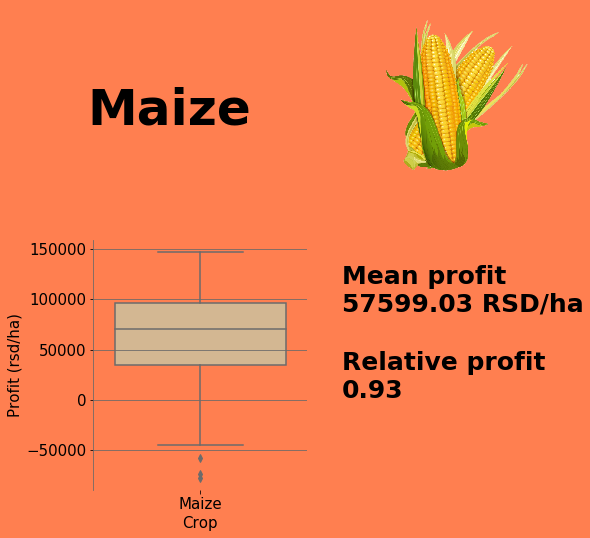

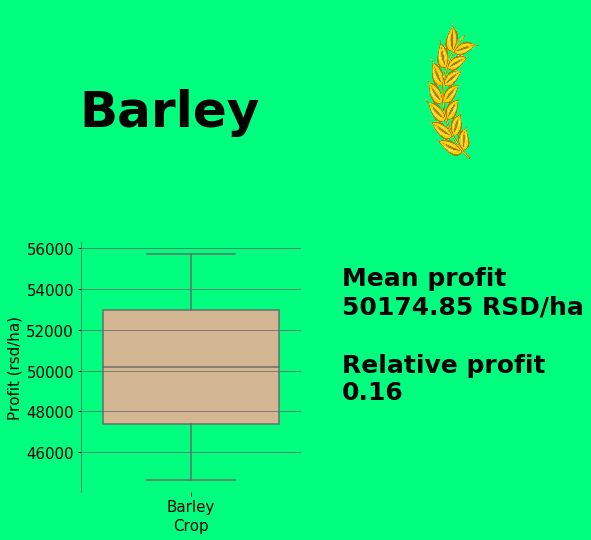

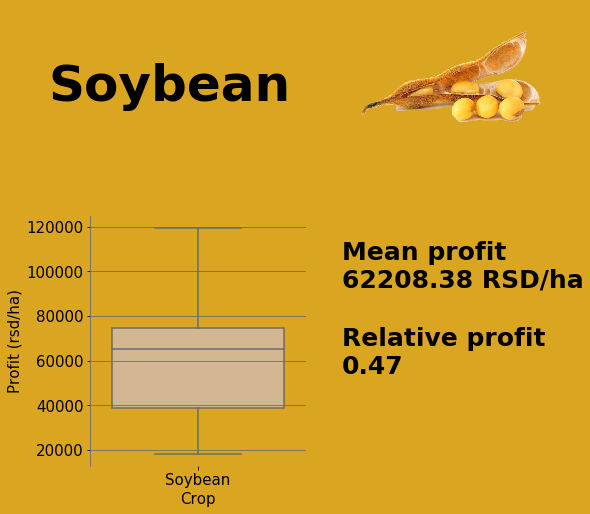

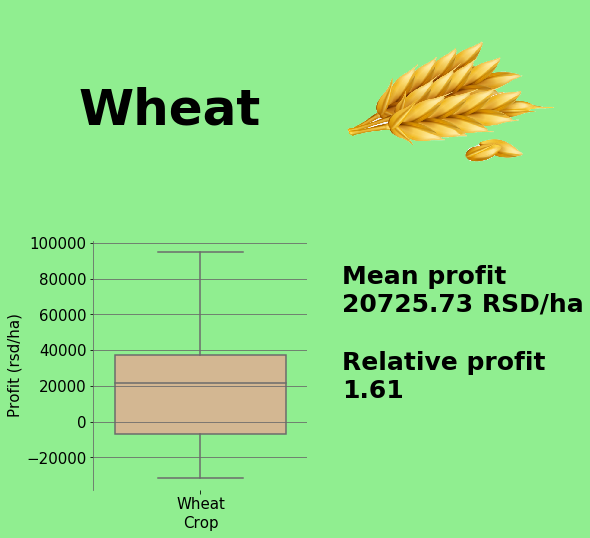

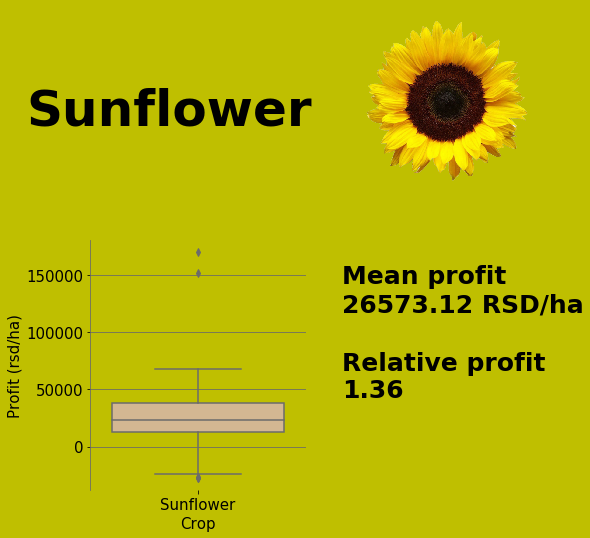

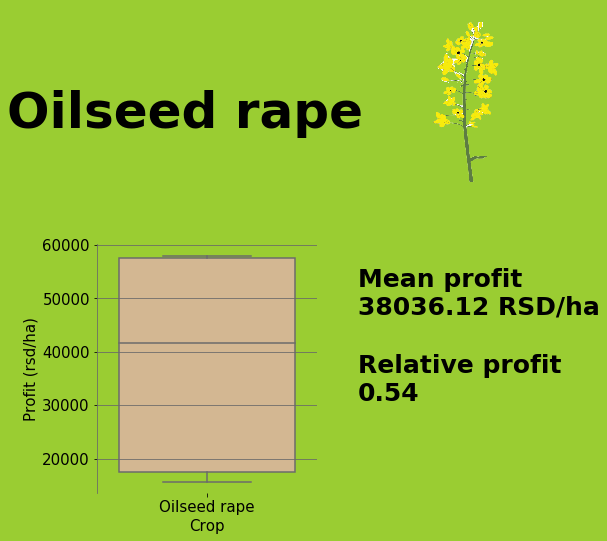

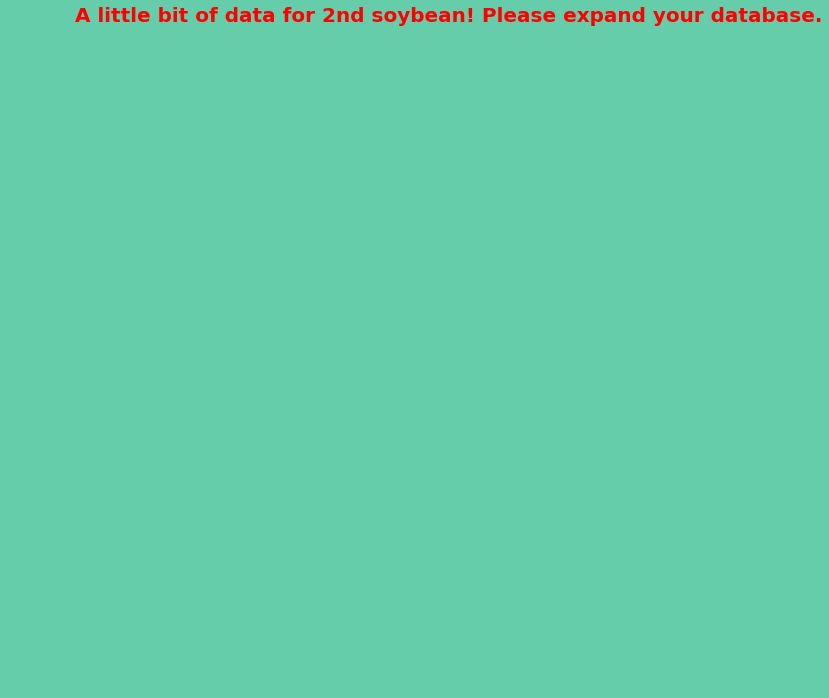

In [129]:
for i in range(n):
    profit(datap,i)

In [130]:
grouped_fp = data[['Fertiliser amount','Pesticide amount']].groupby(data['Crop'])
fp_mean = grouped_fp.mean()
fp_mean

,Fertiliser amount,Pesticide amount
Crop,,
2nd soybean,268.470000,1.570000
Barley,348.438182,4.318599
Maize,426.432458,3.209088
Oilseed rape,620.332712,12.445307
Soybean,316.911727,7.189057
Sunflower,318.253804,6.213735
Wheat,599.808986,5.885619


In [131]:
ranked_f = fp_mean.sort_values(by=['Fertiliser amount'],ascending=False)
ranked_f

,Fertiliser amount,Pesticide amount
Crop,,
Oilseed rape,620.332712,12.445307
Wheat,599.808986,5.885619
Maize,426.432458,3.209088
Barley,348.438182,4.318599
Sunflower,318.253804,6.213735
Soybean,316.911727,7.189057
2nd soybean,268.470000,1.570000


In [132]:
ranked_p = fp_mean.sort_values(by=['Pesticide amount'],ascending=False)
ranked_p

,Fertiliser amount,Pesticide amount
Crop,,
Oilseed rape,620.332712,12.445307
Soybean,316.911727,7.189057
Sunflower,318.253804,6.213735
Wheat,599.808986,5.885619
Barley,348.438182,4.318599
Maize,426.432458,3.209088
2nd soybean,268.470000,1.570000


In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

fp_mean['Fertiliser amount'].plot(kind='bar', color='darkgreen', ax=ax, width=width, position=1,rot=0,fontsize=20)
fp_mean['Pesticide amount'].plot(kind='bar', color='darkorange', ax=ax2, width=width, position=0,rot=0,fontsize=20)

ax.set_ylabel('fertiliser amount (kg/ha)',fontsize=15)
ax2.set_ylabel('pesticide amount (kg/ha)',fontsize=15)
ax.set_xlabel('crop',fontsize=20)
ax.legend(['Fertiliser amount'],loc='upper left', fontsize=15)
ax2.legend(['Pesticide amount'],loc='upper right',fontsize=15)
ax.spines['top'].set_visible(False)

ax2.spines['bottom'].set_color('dimgray')
ax2.spines['right'].set_color('dimgray')
ax2.spines['left'].set_color('dimgray')
ax.spines['left'].set_color('dimgray')


ax.grid(axis='y',color='darkgrey')
ax.grid(None,axis='x')
ax2.grid(None)

#fig.savefig('fertilizer_pesticide.png',bbox_inches='tight',transparent=True)
fig.suptitle('Fertiliser and pesticide consumption (kg/ha)',x=0.5,y=0.98,fontsize=30,fontweight='medium')
plt.show()

In [133]:
grouped_fp_byvar = data[['Fertiliser amount','Pesticide amount']].groupby(data['Variety'])
fp_byvar_mean = grouped_fp_byvar.mean()
fp_byvar_mean

,Fertiliser amount,Pesticide amount
Variety,,
Athlon,802.095000,7.507500
Basmati,585.585000,5.817526
DKC 4943,406.980000,2.910000
DKC 5007,408.741434,2.608645
DKC 5031,480.075984,2.068384
DKC 5276,252.638890,4.624717
DKC 5830,468.647458,1.200937
DKC5276,448.950000,9.680000
Falcon,1084.850000,7.480000


In [134]:
top3_var_p = fp_byvar_mean.sort_values(by=['Pesticide amount'],ascending=False)[:3]
top3_var_p

,Fertiliser amount,Pesticide amount
Variety,,
Immient,620.332712,12.445307
Sumiko,121.130000,11.590000
LG 56.33CL,521.093333,10.683333


In [135]:
top3_var_f = fp_byvar_mean.sort_values(by=['Fertiliser amount'],ascending=False)[:3]
top3_var_f

,Fertiliser amount,Pesticide amount
Variety,,
Falcon,1084.850,7.4800
Athlon,802.095,7.5075
Opusteam,659.830,7.3500


In [136]:
for i in range(n):
    data2 = data[data['Crop'] == crops[i]]
    varieties = list(data2['Variety'].unique())
    variety = list(top3_var_p.index.values)
    if variety[0] in varieties:
        top3_var_p.loc[variety[0],'Crop'] = crops[i]
    if variety[1] in varieties:
        top3_var_p.loc[variety[1],'Crop'] = crops[i]
    if variety[2] in varieties:
        top3_var_p.loc[variety[2],'Crop'] = crops[i]
columns = ['Crop','Pesticide amount','Fertiliser amount']
top3_var_p = top3_var_p[columns]
top3_var_p

,Crop,Pesticide amount,Fertiliser amount
Variety,,,
Immient,Oilseed rape,12.445307,620.332712
Sumiko,Sunflower,11.590000,121.130000
LG 56.33CL,Sunflower,10.683333,521.093333


In [137]:
top3_var_p[['Pesticide amount','Fertiliser amount']] = top3_var_p[['Pesticide amount','Fertiliser amount']].apply(lambda x: round(x,2))
top3_var_p

,Crop,Pesticide amount,Fertiliser amount
Variety,,,
Immient,Oilseed rape,12.45,620.33
Sumiko,Sunflower,11.59,121.13
LG 56.33CL,Sunflower,10.68,521.09


In [ ]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler3_p = top3_var_p.style.set_table_styles(styles).set_caption('Varieties with most used pesticide')

styler3_p

In [138]:
for i in range(n):
    data2 = data[data['Crop'] == crops[i]]
    varieties = list(data2['Variety'].unique())
    variety = list(top3_var_f.index.values)
    if variety[0] in varieties:
        top3_var_f.loc[variety[0],'Crop'] = crops[i]
    if variety[1] in varieties:
        top3_var_f.loc[variety[1],'Crop'] = crops[i]
    if variety[2] in varieties:
        top3_var_f.loc[variety[2],'Crop'] = crops[i]
columns = ['Crop','Fertiliser amount','Pesticide amount']
top3_var_f = top3_var_f[columns]
top3_var_f

,Crop,Fertiliser amount,Pesticide amount
Variety,,,
Falcon,Wheat,1084.850,7.4800
Athlon,Wheat,802.095,7.5075
Opusteam,Wheat,659.830,7.3500


In [139]:
top3_var_f[['Fertiliser amount','Pesticide amount']] = top3_var_f[['Fertiliser amount','Pesticide amount']].apply(lambda x: round(x,2))
top3_var_f

,Crop,Fertiliser amount,Pesticide amount
Variety,,,
Falcon,Wheat,1084.85,7.48
Athlon,Wheat,802.10,7.51
Opusteam,Wheat,659.83,7.35


In [ ]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler3_f = top3_var_f.style.set_table_styles(styles).set_caption('Varieties with most used pesticide')

styler3_f

In [141]:
avg = datap['Profit'].groupby([datap['Crop'],datap['Year']]).mean()
avg

Crop          Year
2nd soybean   2017   -36906.834983
Barley        2016    55733.293467
              2018    44616.414471
Maize         2016    81186.361763
              2017     3798.452792
              2018    86740.116464
Oilseed rape  2017    17403.900000
              2018    43194.178474
Soybean       2016    78399.950184
              2017    30976.215984
              2018    77248.973131
Sunflower     2016    34081.473755
              2017     3926.426593
              2018    36284.014782
Wheat         2016    31515.736855
              2017   -10249.406024
              2018    66000.558219
Name: Profit, dtype: float64

In [142]:
def func2(pct, allvals):
    percent = float((100*pct)/sum(allvals))
    return "{:.2f}%".format(pct,percent)

In [162]:
table = datap[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0)
table

Crop,2nd soybean,Barley,Maize,Oilseed rape,Soybean,Sunflower,Wheat
Previous crop,,,,,,,
Maize,0,1,1,0,10,8,15
None,0,1,30,0,6,38,19
Oilseed rape,0,0,0,0,0,0,1
Soybean,0,0,12,0,0,0,0
Sunflower,0,0,9,0,0,0,15
Wheat,1,0,15,5,2,7,0


In [164]:
oportunities = table.loc['Sunflower']
sorted_oportunities = oportunities.sort_values(ascending=False)

posible_crop = [c for c in list(sorted_oportunities.index.values) if sorted_oportunities[c] != 0]
posible_crop

['Wheat', 'Maize']

In [178]:
def evaluate_decision(data):
    table = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0)
    average_profit = data['Profit'].groupby([data['Crop'],data['Year']]).mean()
    index = list(average_profit.index.values)
    good_parcels = []
    profit = []
    profit_crops = []
    d = {}
    bad_parcels = 0
    not_enough_data = 0
    for i in list(data.index.values):
        crop_today = data.loc[i,'Crop']
        crop_before = data.loc[i,'Previous crop']
        year = data.loc[i,'Year']
        
        profit_today = data.loc[i,'Profit']
        oportunities = table.loc[crop_before]
        
        posible_crops = [c for c in list(oportunities.index.values) if oportunities[c] != 0]
        for crop_tomorrow in posible_crops:
            if crop_tomorrow != crop_today:
                if (crop_tomorrow,year) in index:
                    posible_profit = average_profit.xs((crop_tomorrow,year))
                    profit += [posible_profit]
                    profit_crops += [(posible_profit,crop_tomorrow)]
                else:
                    not_enough_data += 1
            else:
                continue
        d[crop_today] = profit_crops
        if profit_today >= max(profit):
            good_parcels += [data.loc[i,'Parcel']]   
        else:
            bad_parcels += 1
    
    return bad_parcels,len(good_parcels),not_enough_data, d

In [179]:
bad_parcels, good, not_enough_data, d = evaluate_decision(datap)

In [181]:
d

{'Maize': [(44616.414471, 'Barley'),
  (77248.97313133332, 'Soybean'),
  (36284.014781909085, 'Sunflower'),
  (66000.55821918182, 'Wheat'),
  (86740.11646375908, 'Maize'),
  (77248.97313133332, 'Soybean'),
  (36284.014781909085, 'Sunflower'),
  (66000.55821918182, 'Wheat'),
  (44616.414471, 'Barley'),
  (86740.11646375908, 'Maize'),
  (36284.014781909085, 'Sunflower'),
  (66000.55821918182, 'Wheat'),
  (44616.414471, 'Barley'),
  (86740.11646375908, 'Maize'),
  (36284.014781909085, 'Sunflower'),
  (66000.55821918182, 'Wheat'),
  (43194.17847375, 'Oilseed rape'),
  (77248.97313133332, 'Soybean'),
  (36284.014781909085, 'Sunflower'),
  (43194.17847375, 'Oilseed rape'),
  (77248.97313133332, 'Soybean'),
  (36284.014781909085, 'Sunflower'),
  (44616.414471, 'Barley'),
  (86740.11646375908, 'Maize'),
  (36284.014781909085, 'Sunflower'),
  (66000.55821918182, 'Wheat'),
  (44616.414471, 'Barley'),
  (86740.11646375908, 'Maize'),
  (36284.014781909085, 'Sunflower'),
  (66000.55821918182, 'Whea

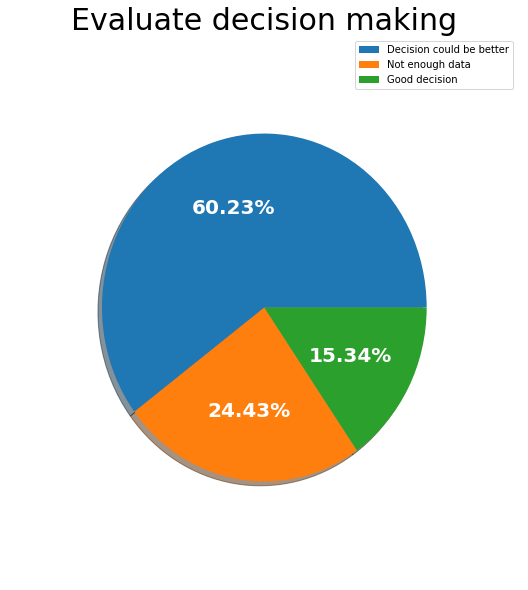

In [180]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
    
pie = [num,not_enough_data,good]
wedges, texts, autotexts = ax.pie(x=pie, labels=['Decision could be better','Not enough data','Good decision'],
                                      autopct=lambda pct: func2(pct, pie),radius=0.8,shadow=True, textprops=dict(color="w"))
plt.setp(autotexts,fontsize=20,fontweight='bold', color='w')
        
ax.set_title('Evaluate decision making',fontdict={'fontsize': 30, 'fontweight': 'medium', 'color': 'k'})
ax.legend(loc=1,fontsize=10)
props = dict(facecolor='white',edgecolor='dimgrey',alpha=0.5,pad=10)
text = "Parcel with good farmer's decision: \n"
"""for parcel in list(good_decision.keys()):
text += '\u2022'+parcel+'\n'
plt.figtext(0.99,0.4,text,bbox=props,fontsize=15,va='top', ha='left')"""

ax.axis('off')
    
plt.show()

In [ ]:
#relative share fertiliser and pesticide in all costs
grouped_c = dfcosts.sum(axis=1).groupby(datap['Crop'])
outcomes = grouped_c.mean()
outcomes

In [ ]:
grouped_fp_costs = datap[['Fertiliser','Pesticide']].groupby(datap['Crop'])
fp_costs = grouped_fp_costs.mean()
fp_costs

In [ ]:
relative_fertilizer = fp_costs['Fertiliser']*100 / outcomes
relative_fertilizer

In [ ]:
relative_pesticide = fp_costs['Pesticide']*100 / outcomes
relative_pesticide

In [ ]:
share = pd.concat([relative_fertilizer,relative_pesticide],axis=1)
share.columns = ['Fertilizer','Pesticide']
share = share.applymap(lambda x: "{:.2f}%".format(x))
share

In [ ]:
styles = [dict(selector="th", props=[("font-size", "100%"),("text-align", "center"),("background-color","olivedrab"),("border-left","0.2px solid black")]),
          dict(selector="caption", props=[("text-align","center"),("font-weight","bold"),("font-size","150%")]),
         dict(selector="td", props=[("font-size", "100%"),("text-align", "center"),("background-color","#cce59a"),("border","0.2px solid black")]),
          dict(selector="th:first-child", props=[("border","0.2px solid black")]),
         dict(selector='',props=[("border-collapse","collapse"),("border","0.2px solid black")])]

styler4 = share.style.set_table_styles(styles).set_caption('Share of fertilizer and pesticide in all costs')

styler4